In [ ]:
#Gerekli kütüphaneleri yüklüyoruz
import numpy as np  #sayısal işlemler için kütüphane
import matplotlib.pyplot as plt  #görüntü çizimi için kütüphane

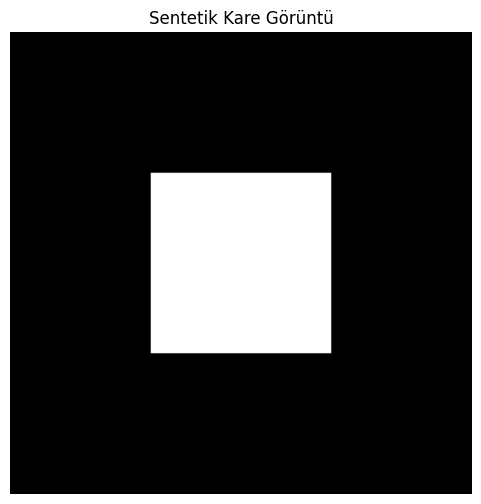

In [ ]:
#256x256 boyutunda siyah bir görüntü oluştur
image = np.zeros((256, 256), dtype=np.uint8) #uint8: 0-255 arası değerler

#Belirlediğimiz şekil olan karenin başlangıç koordinatını belirle
#Sol üst köşe
start_point = (78,78)
#Kare için bitiş koordinatı belirle
#Sağ alt köşe
end_point = (178, 178)

#Belirlediğimiz alanı beyaz yaparak kareyi çizelim
image[start_point[0]:end_point[0], start_point[1]:end_point[1]] = 255 #Beyaz kare

plt.figure(figsize=(6,6)) #Grafik boyutunu 6x6 inç ayarla
plt.imshow(image, cmap='gray')  #Görüntüyü gri tonlarla çiz
plt.title('Sentetik Kare Görüntü')
plt.axis('off') #Eksenleri gizle
plt.show() #Görüntüyü göster


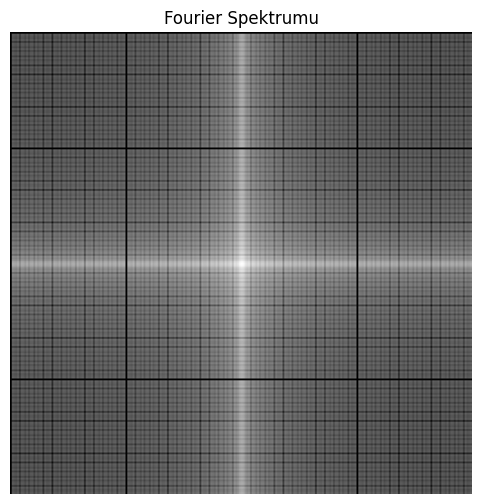

In [ ]:
#2D Fourier Transform uygulayarak görüntünün frekans bileşenlerini elde et
f_transform = np.fft.fft2(image) #Görüntünün 2D Fourier dönüşümünü al

# Düşük frekans bileşenlerini merkeze taşımak için fftshift uygula
f_shift = np.fft.fftshift(f_transform)  # Spektrumu merkeze hizala

# Spektrumun büyüklüğünü hesapla
magnitude_spectrum = np.abs(f_shift)  # Karmaşık sayıların mutlak değeri alınır

# Logaritmik ölçek uygulayarak spektrumu daha net gör
log_magnitude_spectrum = np.log(1 + magnitude_spectrum)  # Log(1 + |F|) formülü

# Spektrumu görselleştir
plt.figure(figsize=(6,6))  # Grafik boyutu 6x6 inç
plt.imshow(log_magnitude_spectrum, cmap='gray')  # Spektrumu gri tonlarda göster
plt.title('Fourier Spektrumu')
plt.axis('off')  # Eksenleri kapat
plt.show()  # Grafiği göster

Bu aşamada elde ettiğimiz Fourier spektrumunda, merkezdeki parlaklık düşük frekansların yoğunluğunu gösterir.
Yatay ve dikey çizgiler ise görüntüdeki keskin kenarlara karşılık gelir.
Sentetik kare yapının simetrisi nedeniyle spektrum da simetrik ve düzenli bir yapıya sahiptir.

*Yüksek Geçiren Filtre Uygulama*

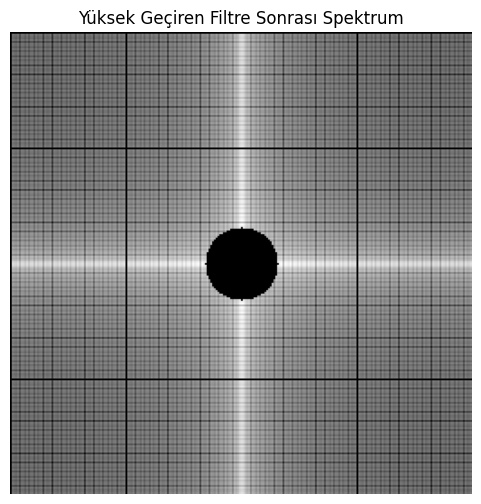

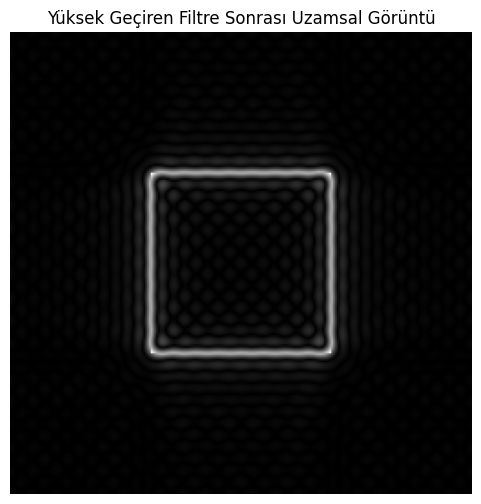

In [ ]:
#256x256 boyutunda bir maske oluştur, başlangıç her yeri 1 yap
high_pass_mask = np.ones((256, 256), dtype=np.uint8)  # Başlangıçta tüm frekanslar geçiyor (1)

#Maskenin merkezine küçük bir sıfır bölgesi ekle
center = (128, 128)  # Görüntü boyutunun merkezi
radius = 20  # Merkezde 20 piksel yarıçapında bir bölgeyi sıfırlayacağız (düşük frekanslar)

# Düşük frekans bölgesini 0 yap (beyaz bir daire şeklinde)
for u in range(256):
    for v in range(256):
        if np.sqrt((u - center[0])**2 + (v - center[1])**2) <= radius: # bir dairenin matematiksel denklem formu
            high_pass_mask[u, v] = 0  # Merkezdeki düşük frekansları kapat


# Spektrum ile maskeyi çarp (filtre uygula)
f_shift_highpass = f_shift * high_pass_mask  # Frekans bileşenlerinde düşük frekansları bastır

# Spektrumu logaritmik olarak göster (filtre sonrası)
magnitude_spectrum_highpass = np.log(1 + np.abs(f_shift_highpass))  # Log ölçekli spektrum


# Ters Fourier Transform ile uzamsal görüntüyü elde et
f_ishift = np.fft.ifftshift(f_shift_highpass)  # fftshift'in tersini al
img_back = np.fft.ifft2(f_ishift)  # Ters Fourier dönüşümü uygula
img_back = np.abs(img_back)  # Karmaşık sayıların mutlak değeri alınır

# Filtrelenmiş spektrumu göster
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_highpass, cmap='gray')
plt.title('Yüksek Geçiren Filtre Sonrası Spektrum')
plt.axis('off')
plt.show()

# Filtrelenmiş uzamsal görüntüyü göster
plt.figure(figsize=(6,6))
plt.imshow(img_back, cmap='gray')
plt.title('Yüksek Geçiren Filtre Sonrası Uzamsal Görüntü')
plt.axis('off')
plt.show()


Yüksek geçiren filtre uygulaması sonrasında spektrum üzerinde merkezdeki düşük frekans bileşenlerinin yok edildiği ve yalnızca yüksek frekans bileşenlerinin korunduğu gözlenmiştir.
Uzamsal düzlemde ise görüntüdeki düz alanlar kaybolmuş, yalnızca kenarlar ve ani parlaklık değişimlerini temsil eden yapılar belirginleşmiştir.
Bu durum, yüksek geçiren filtrelerin temel işlevi olan kenar vurgulama ve detay çıkarımını başarıyla göstermektedir.

Alçak Geçiren Filtre *Uygulama*

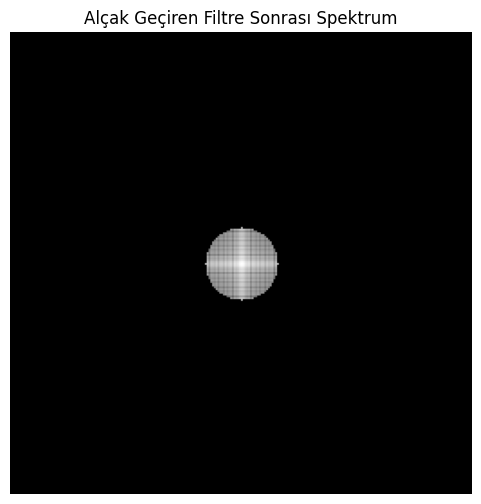

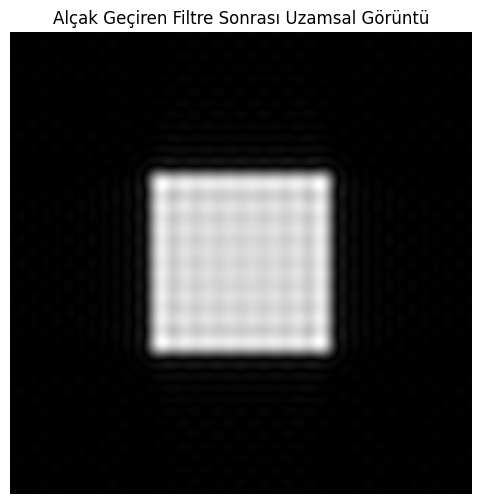

In [ ]:
# 256x256 boyutunda bir maske oluştur, başlangıçta tüm değerleri 0 yap
low_pass_mask = np.zeros((256, 256), dtype=np.uint8)  # Başlangıçta tüm frekanslar engellenmiş (0)

# Maskenin merkezine küçük bir bir (1) bölgesi ekle
center = (128, 128)  # Görüntünün merkezi
radius = 20  # Merkezde 20 piksel yarıçapında bir alan koruyacağız (düşük frekanslar)

# Düşük frekans bölgesini 1 yap (beyaz bir daire şeklinde)
for u in range(256):
    for v in range(256):
        if np.sqrt((u - center[0])**2 + (v - center[1])**2) <= radius:
            low_pass_mask[u, v] = 1  # Merkezdeki düşük frekanslar geçsin


# Spektrum ile maskeyi çarp (filtre uygula)
f_shift_lowpass = f_shift * low_pass_mask  # Yüksek frekansları bastır, düşük frekansları geçir

# Spektrumu logaritmik olarak göster (filtre sonrası)
magnitude_spectrum_lowpass = np.log(1 + np.abs(f_shift_lowpass))  # Log ölçekli spektrum

# Ters Fourier Transform ile uzamsal görüntüyü elde et
f_ishift_lowpass = np.fft.ifftshift(f_shift_lowpass)  # fftshift'in tersini al
img_back_lowpass = np.fft.ifft2(f_ishift_lowpass)  # Ters Fourier dönüşümü uygula
img_back_lowpass = np.abs(img_back_lowpass)  # Karmaşık sayıların mutlak değeri alınır


# Filtrelenmiş spektrumu göster
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_lowpass, cmap='gray')
plt.title('Alçak Geçiren Filtre Sonrası Spektrum')
plt.axis('off')
plt.show()

# Filtrelenmiş uzamsal görüntüyü göster
plt.figure(figsize=(6,6))
plt.imshow(img_back_lowpass, cmap='gray')
plt.title('Alçak Geçiren Filtre Sonrası Uzamsal Görüntü')
plt.axis('off')
plt.show()

Alçak geçiren filtre uygulaması sonrasında, frekans spektrumunun yalnızca merkezindeki düşük frekans bileşenlerinin korunduğu, yüksek frekans bileşenlerinin ise bastırıldığı gözlenmiştir.
Uzamsal düzlemde ise bu durum görüntüdeki keskin kenarların yumuşamasına, detayların silikleşmesine ve genel yapının bulanıklaşmasına neden olmuştur.
Alçak geçiren filtrelerin temel özelliği olan "bulanıklaştırma" etkisi başarılı şekilde elde edilmiştir.

*Cosinus Gürültüsü Ekleme (Okul Numarası Toplamına Göre)*

230601032 → 2+3+0+6+0+1+0+3+2 = 17

230601035 → 2+3+0+6+0+1+0+3+5 = 20

230601040 → 2+3+0+6+0+1+0+4+0 = 16

 Toplam = 17 + 20 + 16 = 53

  Yani cosinüs dalgasının frekansı: 53 olacak

Kare görüntümüze cosinus sinyali ekleyeceğiz:

I gürültü(x,y) = I(x,y) + A.cos(2πfx)

I(x,y): Orijinal görüntü

I gürültü(x,y) : Gürültü eklenmiş yeni görüntü


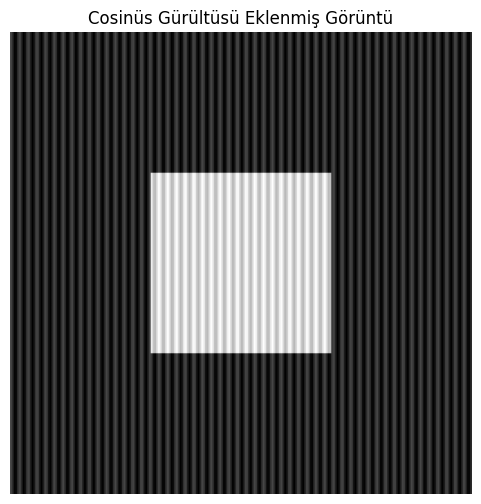

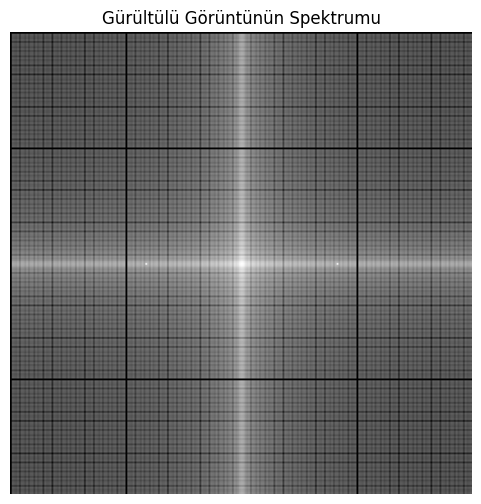

In [ ]:
#Gürültü için frekans ve genliği belirle
frequency = 53  # Cosinüs dalgasının frekansı
amplitude = 50  # Gürültü genliği

# Cosinus gürültüsünü sadece x (yatay) yönünde oluştur
rows, cols = image.shape  # Görüntü boyutları (256x256)
x = np.arange(cols)  # 0'dan 255'e kadar x ekseni
cos_wave = amplitude * np.cos(2 * np.pi * frequency * x / cols)  # 1D cos dalgası

# Dalga tüm satırlara aynı şekilde uygulanacak (yatay dalga için)
cos_noise = np.tile(cos_wave, (rows, 1))  # Her satıra aynı dalgayı kopyala

# Gürültülü görüntüyü oluştur
noisy_image = image + cos_noise  # Orijinal görüntüye cos gürültüsü ekle


# Gürültülü görüntüyü göster
plt.figure(figsize=(6,6))
plt.imshow(noisy_image, cmap='gray')
plt.title('Cosinüs Gürültüsü Eklenmiş Görüntü')
plt.axis('off')
plt.show()

# Fourier dönüşümünü al ve spektrumunu göster
f_transform_noise = np.fft.fft2(noisy_image)
f_shift_noise = np.fft.fftshift(f_transform_noise)
magnitude_spectrum_noise = np.log(1 + np.abs(f_shift_noise))

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_noise, cmap='gray')
plt.title('Gürültülü Görüntünün Spektrumu')
plt.axis('off')
plt.show()

Bu aşamada, okul numaraları toplamı olan 53 frekansında yatay doğrultuda bir cosinüs sinyali oluşturularak orijinal sentetik görüntüye eklenmiştir.
Cosinüs dalgası görüntü üzerinde periyodik bir desen meydana getirmiş ve görüntüye frekans bazlı bir gürültü katmıştır.

Spektrum incelendiğinde, orijinal spektral yapının büyük ölçüde korunduğu ve yalnızca yatay eksende, merkezin sağında ve solunda yeni tepe noktalarının oluştuğu gözlemlenmiştir.

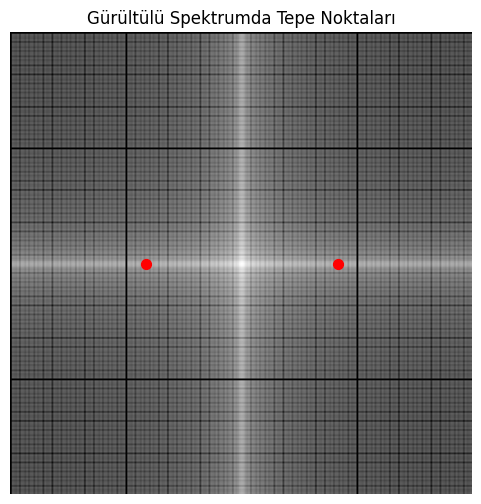

In [ ]:
# Spektrumun merkez koordinatını bul
center_x, center_y = np.array(f_shift_noise.shape) // 2  # 256x256 olduğu için (128,128)

# Cosinüs sinyalinin frekansı 53 olduğu için, sağa ve sola 53 birim uzaklığa bakacağız
offset = 53  # Gürültü frekansı

# Sağ ve sol tepe noktalarının koordinatları
peak1 = (center_y + offset, center_x)  # Sağdaki tepe (x ekseninde sağa)
peak2 = (center_y - offset, center_x)  # Soldaki tepe (x ekseninde sola)

# Spektrumu çizelim
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_noise, cmap='gray')  # Spektrumu göster
plt.scatter([peak1[0], peak2[0]], [peak1[1], peak2[1]], color='red', s=50, marker='o')  # Tepe noktalarını kırmızı ile işaretle
plt.title('Gürültülü Spektrumda Tepe Noktaları')
plt.axis('off')
plt.show()

Gürültülü görüntünün spektral analizinde, yatay eksende, merkezin yaklaşık 53 birim sağında ve solunda iki belirgin tepe noktası gözlemlenmiştir.
Bu tepe noktaları, görüntüye eklenen 53 frekansındaki cosinüs sinyalinin Fourier dönüşümündeki karşılıklarıdır.
Cosinüs sinyali sabit bir frekansta enerji taşıdığı için, spektrum üzerinde simetrik iki pik oluşturur.
Spektrumun geri kalan kısmı ise, orijinal sentetik görüntünün düşük ve yüksek frekans bileşenlerini temsil etmeye devam etmektedir.

*Bant Durduran Filtre Uygulayıp Gürültüyü Yok Etmek*

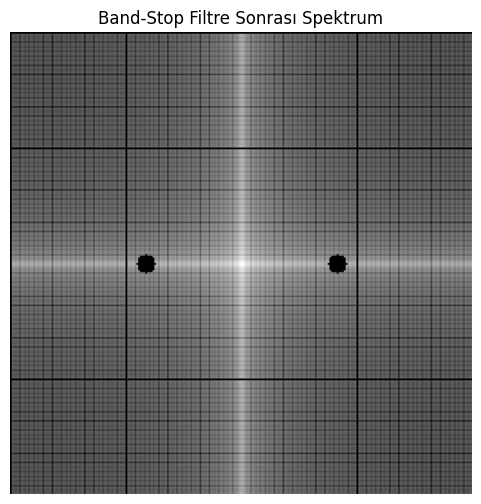

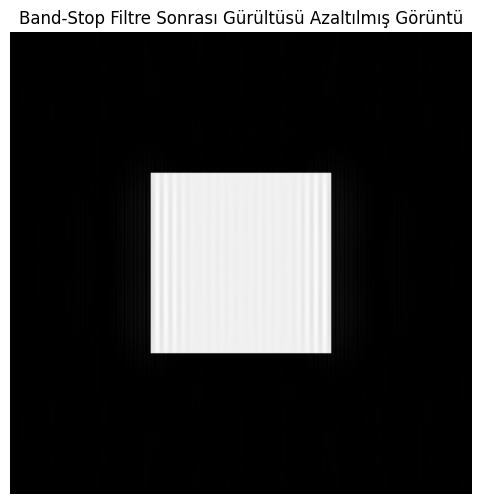

In [ ]:
# 256x256 boyutunda, başlangıçta tüm değerleri 1 olan bir band-stop maske oluştur
band_stop_mask = np.ones((256, 256), dtype=np.uint8)  # Başlangıçta tüm frekanslar geçiyor (1)

# Tepe noktalarını bastırmak için merkezden sağa ve sola offset kadar uzaklıktaki bölgeleri sıfırlayacağız
center_x, center_y = np.array(f_shift_noise.shape) // 2  # Merkez (128, 128)
offset = 53  # Gürültü frekansı
band_radius = 5  # Durdurulacak bandın yarıçapı (5 piksel civarında küçük bir bölgeyi sıfırlayacağız)

# Sağdaki tepe noktası için sıfırlama
for u in range(256):
    for v in range(256):
        if np.sqrt((u - center_x)**2 + (v - (center_y + offset))**2) <= band_radius:
            band_stop_mask[u, v] = 0  # Sağdaki gürültüyü bastır

# Soldaki tepe noktası için sıfırlama
for u in range(256):
    for v in range(256):
        if np.sqrt((u - center_x)**2 + (v - (center_y - offset))**2) <= band_radius:
            band_stop_mask[u, v] = 0  # Soldaki gürültüyü bastır

# Gürültülü spektrum ile band-stop maskeyi çarp (filtre uygula)
filtered_spectrum = f_shift_noise * band_stop_mask

# Yeni spektrumu görselleştir
magnitude_spectrum_filtered = np.log(1 + np.abs(filtered_spectrum))
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Band-Stop Filtre Sonrası Spektrum')
plt.axis('off')
plt.show()

# Ters Fourier dönüşümü yaparak uzamsal düzlemde yeni görüntüyü elde et
f_ishift_filtered = np.fft.ifftshift(filtered_spectrum)  # fftshift'in tersini al
recovered_image = np.fft.ifft2(f_ishift_filtered)  # Ters Fourier dönüşümünü uygula
recovered_image = np.abs(recovered_image)  # Mutlak değeri al

# Gürültüsü azaltılmış görüntüyü göster
plt.figure(figsize=(6,6))
plt.imshow(recovered_image, cmap='gray')
plt.title('Band-Stop Filtre Sonrası Gürültüsü Azaltılmış Görüntü')
plt.axis('off')
plt.show()

Gürültülü görüntü üzerinde uygulanan band-stop (bant durduran) filtreleme işlemi sonrasında, frekans düzleminde cosinüs gürültüsüne karşılık gelen simetrik iki tepe noktası etkili bir şekilde bastırılmıştır.
Spektrumda bu frekans bileşenlerinin ortadan kaldırılması ile birlikte, uzamsal düzlemde cosinüs kaynaklı periyodik desenlerin büyük ölçüde azaldığı ve görüntünün daha homojen bir yapıya kavuştuğu gözlenmiştir.
Band-stop filtreleme, belirli bir frekans bileşenini hedef alarak istenmeyen gürültüleri seçici bir şekilde bastırmada oldukça etkili olmuştur.